# PS 3 - Hongyi Tang

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 Explore Distribution

1.1

In [62]:
S = 10_000

1.2

In [63]:
d1 = np.random.lognormal(0, 0.2, size=S)
d2 = np.random.lognormal(0, 0.5, size=S)
d3 = np.random.lognormal(0, 1.68, size=S)



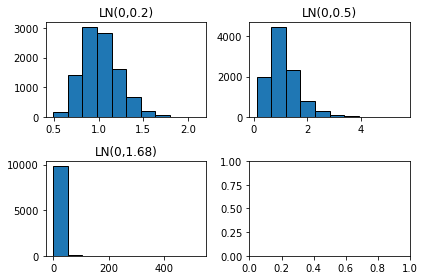

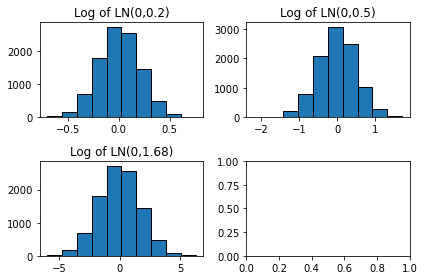

In [64]:
# All three plots look a bit skewed
fig, axs = plt.subplots(2,2)
_ = axs[0, 0].hist(d1, edgecolor = "black")
axs[0, 0].set_title("LN(0,0.2)")
_ = axs[0, 1].hist(d2, edgecolor = "black")
axs[0, 1].set_title("LN(0,0.5)")
_ = axs[1, 0].hist(d3, edgecolor = "black")
axs[1, 0].set_title("LN(0,1.68)")
fig.tight_layout()
# log-linear
fig, axs = plt.subplots(2,2)
_ = axs[0, 0].hist(np.log(d1), edgecolor = "black")
axs[0, 0].set_title("Log of LN(0,0.2)")
_ = axs[0, 1].hist(np.log(d2), edgecolor = "black")
axs[0, 1].set_title("Log of LN(0,0.5)")
_ = axs[1, 0].hist(np.log(d3), edgecolor = "black")
axs[1, 0].set_title("Log of LN(0,1.68)")
fig.tight_layout()


1.3

LN(0,1.68) describes the most unequal distribution, and LN(0,0.2) describes the least unequal distribution

1.4

In [65]:
# LN(0,0.2)
sample_mean = np.mean(d1)
sample_variance = np.var(d1)
print(sample_mean)
print(sample_variance)
#theoretical mean and variance
expect = np.exp(0+1/2*(0.2**2))
variance = np.exp(2*0+0.2**2)*(np.exp(0.2**2)-1)
print(expect)
print(variance)

print()
# LN(0,0.5)
sample_mean = np.mean(d2)
sample_variance = np.var(d2)
print(sample_mean)
print(sample_variance)
#theoretical mean and variance
expect = np.exp(0+1/2*(0.5**2))
variance = np.exp(2*0+0.5**2)*(np.exp(0.5**2)-1)
print(expect)
print(variance)

print()
# LN(0,1.68)
sample_mean = np.mean(d3)
sample_variance = np.var(d3)
print(sample_mean)
print(sample_variance)
#theoretical mean and variance
expect = np.exp(0+1/2*(1.68**2))
variance = np.exp(2*0+1.68**2)*(np.exp(1.68**2)-1)
print(expect)
print(variance)

# Yes, there are pretty similar. 

1.0239405190470399
0.04271140880307463
1.0202013400267558
0.04247629348257031

1.1288287319423962
0.35685107592745063
1.1331484530668263
0.3646958540123865

3.890318191517679
148.21925462830933
4.1008735008239405
265.99982369887033


1.5

In [70]:
d1_sum = d1.sum()
d2_sum = d2.sum()
d3_sum = d3.sum()

In [71]:

for i in range(1,51):
    topd1 = np.percentile(d1, 100 - i)
    ratiod1 = d1[d1 > topd1].sum()/d1_sum
    
    if 100*ratiod1 > (100 - i):
        print("Top",i, "percent take up:",ratiod1,"total for d1")
        break
for i in range(1,51):
    topd2 = np.percentile(d2, 100 - i)
    ratiod2 = d2[d2 > topd2].sum()/d2_sum
    
    if 100*ratiod2 > (100 - i):
        print("Top",i, "percent take up:",ratiod2,"total for d2")
        break
for i in range(1,51):
    topd3 = np.percentile(d3, 100 - i)
    ratiod3 = d3[d3 > topd3].sum()/d3_sum
    
    if 100*ratiod3 > (100 - i):
        print("Top",i, "percent take up:",ratiod3,"total for d3")
        break

Top 46 percent take up: 0.5400742855109509 total for d1
Top 41 percent take up: 0.6050788297693204 total for d2
Top 21 percent take up: 0.8021620768154408 total for d3


In [89]:
treat = pd.read_csv("../data/treatment.csv.bz2",sep = "\t")
mag = pd.read_csv("../data/mag-30k-citations.csv.bz2",sep = "\t")
lunar = pd.read_csv("../data/lunar-impact-craters_v08-2015-09.csv.bz2",sep="\t")

income = treat.re78.dropna()
citations = mag.citations.dropna()
radius = lunar[[lunar.columns[7]]].dropna()


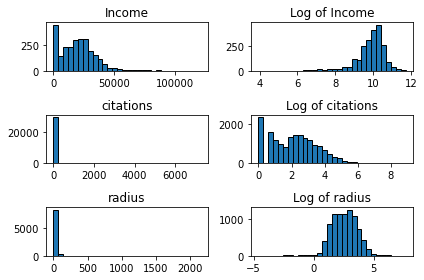

In [96]:
fig, axs = plt.subplots(3,2)
_ = axs[0, 0].hist(income, edgecolor = "black", bins=30)
axs[0, 0].set_title("Income")
_ = axs[0, 1].hist(np.log(income[income > 0]), edgecolor = "black", bins=30)
axs[0, 1].set_title("Log of Income")
_ = axs[1, 0].hist(citations, edgecolor = "black",bins=30)
axs[1, 0].set_title("citations")
_ = axs[1, 1].hist(np.log(citations[citations > 0]), edgecolor = "black",bins=30)
axs[1, 1].set_title("Log of citations")
_ = axs[2, 0].hist(radius, edgecolor = "black", bins=30)
axs[2, 0].set_title("radius")
_ = axs[2, 1].hist(np.log(radius), edgecolor = "black", bins=30)
axs[2, 1].set_title("Log of radius")
fig.tight_layout()

# the income and radius look closer to log-normal, 
# but the citations doesn't. log of citations is a bit more left skewed (closer to exponential distribution)

# 2 Explore Central Limit Theorem

2.1

Expected value is -1 * 0.5 + 1 * 0.5 = 0 

Var(X) = 0.5 * (-1)^2 + 1^2 * 0.5 - 0^2 = 1

2.2

R = 1000

2.3 & 2.4

In [32]:
# Here is the function to perform different sample size on R = 1000 (1000 times repetition)
def different_sample(S):
    sample_generator = np.random.choice([1,-1], size=(1000,S))
    sample_mean = np.mean(sample_generator, axis=1)
    sample_variance = np.var(sample_mean)
    sample_mean_mean = np.mean(sample_mean)
    plt.hist(sample_mean, bins = 100, color = "lightgreen", edgecolor = "black")
    
    print("The mean of these samples are", sample_mean_mean, ", and the variance of these samples are", sample_variance)

The mean of these samples are 0.002 , and the variance of these samples are 0.9999959999999998


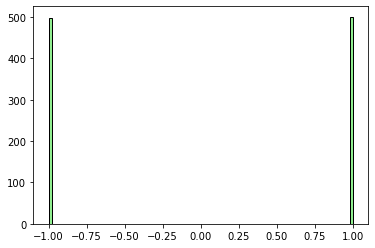

In [33]:
# 2.3 & 2.4 when sample size is 1 and R = 1000
different_sample(1)
# The results are pretty close to the therotical values we computed at question 1

2.5 & 2.6 & 2.7

The mean of these samples are -0.027 , and the variance of these samples are 0.5002709999999999


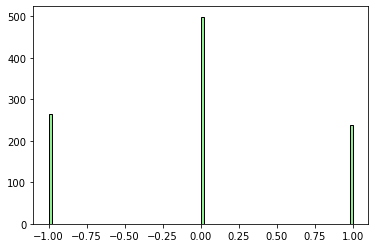

In [23]:
# 2.5 & 2.6 & 2.7 when sample size is 2 and R = 1000
different_sample(2)
# 2.7 expected value of pair means: E[(x1+x2)/2] = 1/2 * E[x1+x2] = 1/2*(E[x1]+E[x2])= 0 
# variance of pair means: Var[(x1+x2)/2] = 1/4Var(x1+x2) = 1/4((Var(x1) + Var(x2)) = 1/2
# This time the difference is slightly bigger, but the mean is still pretty close to the previous calculation. 
# However, the variance is half what we calculated before when S = 1

2.8

The mean of these samples are 0.001600000000000005 , and the variance of these samples are 0.20799743999999998


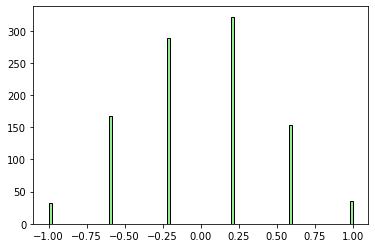

In [16]:
# 2.8 when sample size is 5 and R = 1000
different_sample(5)
#The mean is still pretty similar but the variance is a lot smaller. 
#It is a lot more like normaly distributed compared to prervious histograms

2.9

The mean of these samples are 0.009360000000000002 , and the variance of these samples are 0.03972039040000001


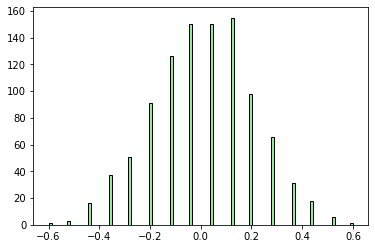

In [21]:
# 2.9 when sample size is and R = 1000
different_sample(25)
#The mean is still pretty similar but the variance is even smaller than when simple size was 5. 

2.10

The mean of these samples are -0.001532 , and the variance of these samples are 0.0009983329760000002


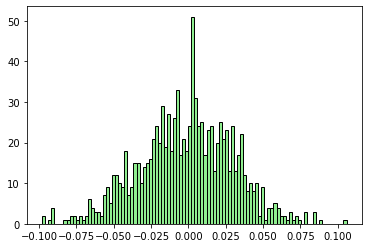

In [22]:
# 2.10 when sample size is and R = 1000
different_sample(1000)
#The mean is still pretty similar but the variance is even smaller than when simple size was 25. 

2.11

As sample size increases, the shape of the histogram is more normally distributed

2.12

Based on my understanding, I think when we increase the sample size, we are constantly removing a lot of the extreme conditions. For example, when there is only one sample, it is very easy to get either 1 or 2. However, when the sample size increases to 2, it wil be harder to get -1 or 1 since the expected value is 0. Just like that as sample gets bigger and bigger, the histogram will eventually turn into a perfect normal distribution with 0 centered in the middle.

## Total time: 8hrs